<a href="https://colab.research.google.com/github/akitim/pet-projects/blob/master/miscellaneous.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Из статьи на хабре по [R.SPSS](https://habr.com/ru/post/92135/)

0.96255

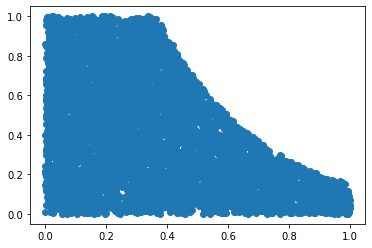

In [ ]:
#> x=runif(10000,0,0.5)
#> y=runif(10000,0,3)
#> t=y<3*exp(-3*x)
#> u=x[t]
#> v=y[t]
#> plot(u,v)
#> i=0.5*3*length(u)/10000

import numpy as np
import matplotlib.pyplot as plt
x = np.random.rand(10000)
y = np.random.rand(10000)
t = y < 3*np.exp(-3*x)
u = x[t]
v = y[t]
plt.scatter(u, v)
u.shape
i = 0.5 * 3 * len(u) / 10000
i

### 2 задачи из собеса по Data Science из статьи на [Хабре](https://habr.com/ru/company/ruvds/blog/705094/)

In [ ]:
#  Задача Medium-уровня: для заданной строки s 
#  найдите длину самой длинной подстроки
#  без повторяющихся символов. Используйте язык Python.

def find_longest_substr_no_repitions(s):

    longest_dict = [] in 
    start = 0

    for i in range(len(s) - 1):
        
        substr = s[start : i + 1] #if i < len(s) - 2 else s[start : i + 2]
        if s[i + 1] in substr:
            start += substr.index(s[i + 1]) + 1
            longest_dict += [(substr, len(substr))]
        elif i == len(s) - 2:
            substr += s[i + 1]
            longest_dict += [(substr, len(substr))]
            
    return dict(sorted(longest_dict, key = lambda x: x[1], reverse=True))

s = 'gudojbhoggeggywuikjwjhgolkpiytmn[as'
s = 'qqqqasaqdf'

find_longest_substr_no_repitions(s)

{'saqdf': 5, 'qas': 3, 'q': 1}

In [35]:
# Задача Hard-уровня: Имея две строки str1 и str2, вернуть самую короткую строку,
# в которой есть как str1, так и str2 в качестве подпоследовательностей.
# Если есть несколько допустимых строк, верните любую из них.
# Строка s является подпоследовательностью строки t, если удаление некоторого
# количества символов из t (возможно, 0) приводит к строке s.

import numpy as np
import random

# str1 = 'grta'
# str2 = 'ioua'
# s = 'itrtdgfgowiwrrqubgwahuioyrrugttagjhdrgueag'

s = ''.join([chr(random.randint(97, 122)) for i in range(100)])
str1 = ''.join([chr(random.randint(97, 122)) for i in range(3)])
str2 = ''.join([chr(random.randint(97, 122)) for i in range(2)])

def debug_(it, part, sym, ind, symbol, elem, t):
    line = '='*180
    print (f"iter №{it} part {part}: \nsym:" +
           f"{sym, ind}\nsymbol: {symbol}\nelem: {elem}\n{t}\n{line}\n\n")
    return None

def findall_subseq(subseq, s):
    '''Finds all substrings of s containing subseq'''
    first_index = s.find(subseq[0])

    # a list of lists (different occurences of a subseq
    # in a string)  of tuples (symbol, index in a string) 

    t = [] 
    # it = 1
    # symbol = 'none'

    for ind, sym in enumerate(s):
        if sym == subseq[0]: t += [[(sym, ind)]]
# 1=============================================================================
        # debug_(it, 1, sym, ind, symbol=symbol, elem=None, t=t)
        # it += 1
        
        for index, symbol in enumerate(subseq[1:]):
            if sym == symbol:
                t_temp = t.copy()

                for i, elem in enumerate(t_temp):
                    if len(elem) == index + 1:
                        elem += [(sym, ind)]
# 2=============================================================================                      
                        # debug_(it, 2, sym, ind, symbol, elem=None, t=t_temp)
                        # it += 1
                        
                    elif len(elem) == index + 2:
                        t = t_temp.copy()
                        t += [elem[:-1] + [(sym, ind)]] #add new elements (arrays)
# 3=============================================================================
                        # debug_(it, 3, sym, ind, symbol, elem, t=t)
                        # print (f'elem: {elem}\n')
                        t_temp = t.copy()

    result = sorted(list(set(
        [(ls[0][1], ls[-1][1]) for ls in t if len(ls) == len(subseq)]
    )), key=lambda x: x[1] - x[0])

    return result

def shortest_substring(s, subseq1, subseq2):
    '''Finds shortest substring of s containing both subseq1 and subseq2'''
    ls1 = findall_subseq(subseq1, s)
    ls2 = findall_subseq(subseq2, s)
    (short, lng) = (ls1, ls2) if len(ls2) >= len(ls1) else (ls2, ls1)

    res = ''
    for init_s, fin_s in short:
        for init_l, fin_l in lng:
            if init_s <= init_l and fin_s >= fin_l:
                res = s[init_s : fin_s + 1]
                break
            elif init_s > init_l and fin_s < fin_l:
                res = s[init_l : fin_l + 1]
                break
    
    res = ''.join(
        [lt if lt not in str1 + str2 else lt.upper() for lt in res]
    )

    return res

res1 = findall_subseq(str1, s)
res2 = findall_subseq(str2, s)
shortest = shortest_substring(s, str1, str2)

print (f's: {s}\nstr1: {str1}\nstr2: {str2}\n\nres1: {res1}\nres2: {res2}' +
       f'\n\nshortest string: {shortest}')


s: ulvprdmkcvacueufmqachsrkolpraukqiwodcotcqtavywnryybcwynlvfmihamrfuozkqdbqzugcngcxnttvmscyrhbvxpqewjk
str1: aps
str2: sm

res1: [(18, 86), (10, 86)]
res2: [(21, 58), (21, 62), (21, 85)]

shortest string: AcueufMqAchSrkolPrAukqiwodcotcqtAvywnryybcwynlvfMihAMrfuozkqdbqzugcngcxnttvMS


In [ ]:
from timeit import default_timer as timer

# substr = ''.join([chr(random.randint(97, 123)) for i in range(3)])
# s = ''.join([chr(random.randint(97, 123)) for i in range(10)])

time_ = []
n=10000
for length in range(0, 200, 10):
    substr = ''.join([chr(random.randint(97, 123)) for i in range(3)])
    s = ''.join([chr(random.randint(97, 123)) for i in range(length)])
    sum = 0
    for j in range(n):
        start = timer()
        findall_subseq(substr, s)
        end = timer()
        sum += end - start

    time_ += [sum / n]
    
    # Output length = 0 ... 300, n =10:
    # [1.5560000974801369e-06, 1.0649999239831232e-06, 1.0140000085812062e-06, 1.6931000027398112e-05, 1.0349998774472623e-06, 0.0002397380001639249, 5.4092999744170814e-05, 3.2247999843093564e-05, 5.927900019742083e-05, 5.390799960878212e-05, 9.31587997911265e-05, 9.14759997613146e-05, 6.68450000375742e-05, 0.0015902400993581978, 0.0003223170000637765, 5.569499990087934e-05, 0.00020555579976644367, 0.0003618706001361716, 0.0007777600003464613, 9.302599992224713e-05, 0.00034802600039256503, 0.0009106949999477365, 0.002949902500222379, 0.0004805419997865101, 0.46602991689978807, 0.00042647290028980934, 0.00015935600004013395, 0.0012715509998088236, 0.0002668459999767947, 11.842935129799844]

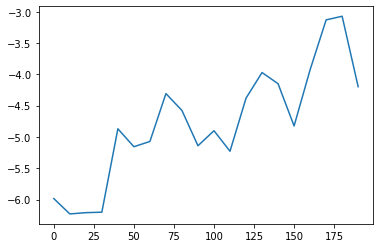

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(0, 300, 10)[0:20], np.log10(time_)[0:20]);

In [ ]:
print(time_)

[1.5560000974801369e-06, 1.0649999239831232e-06, 1.0140000085812062e-06, 1.6931000027398112e-05, 1.0349998774472623e-06, 0.0002397380001639249, 5.4092999744170814e-05, 3.2247999843093564e-05, 5.927900019742083e-05, 5.390799960878212e-05, 9.31587997911265e-05, 9.14759997613146e-05, 6.68450000375742e-05, 0.0015902400993581978, 0.0003223170000637765, 5.569499990087934e-05, 0.00020555579976644367, 0.0003618706001361716, 0.0007777600003464613, 9.302599992224713e-05, 0.00034802600039256503, 0.0009106949999477365, 0.002949902500222379, 0.0004805419997865101, 0.46602991689978807, 0.00042647290028980934, 0.00015935600004013395, 0.0012715509998088236, 0.0002668459999767947, 11.842935129799844]
